# Autoencoder

In [2]:
# import libraries

import numpy as np
import pandas as pd
from numpy import unique, argmax
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

In [29]:
(trainX, trainy), (testX, testy) = mnist.load_data()

In [30]:
# print shape
print("X_Train Shape:", trainX.shape)
print("y_Train Shape:", trainy.shape)
print("X_Test Shape:", testX.shape)
print("y_Test Shape:", testy.shape) 

X_Train Shape: (60000, 28, 28)
y_Train Shape: (60000,)
X_Test Shape: (10000, 28, 28)
y_Test Shape: (10000,)


In [32]:
#reshaping train and test sets
trainX = trainX.reshape((trainX.shape[0], trainX.shape[1],trainX.shape[2],1))
testX = testX .reshape((testX.shape[0], testX.shape[1],testX.shape[2],1))

In [33]:
# print shape
print("X_Train Shape:", trainX.shape)
print("y_Train Shape:", trainy.shape)
print("X_Test Shape:", testX.shape)
print("y_Test Shape:", testy.shape) 

X_Train Shape: (60000, 28, 28, 1)
y_Train Shape: (60000,)
X_Test Shape: (10000, 28, 28, 1)
y_Test Shape: (10000,)


In [34]:
# normalizing the pixel values
trainX = trainX.astype('float32') / 255.0
testX = testX.astype('float32') / 255.0

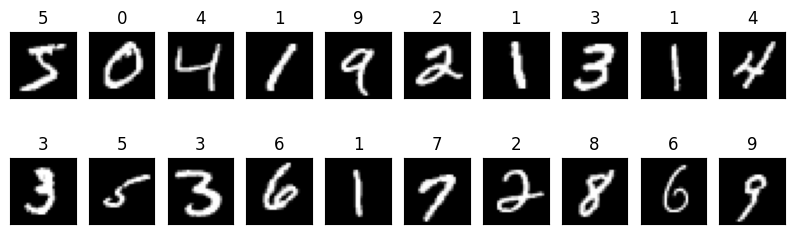

In [35]:
# plotting the images

fig = plt.figure(figsize=(10,3))
for i in range(20):
    ax = fig.add_subplot(2, 10, i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(trainX[i]), cmap='gray')
    ax.set_title(trainy[i])

In [36]:
#Let us try to print the shape of a single image.
shape = trainX.shape[1:]
shape

(28, 28, 1)

In [37]:
# CNN Model
model = Sequential()
model.add(Conv2D(128,(3,3), activation = 'relu', input_shape=shape))
model.add(MaxPool2D(2,2))
model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(32,(3,3), activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(500, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 128)       1280      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 128)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 3, 32)          18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 32)        

In [39]:
# compiling model

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

x = model.fit(trainX, trainy, epochs=10, batch_size=256, validation_split=0.1)

Epoch 1/10
211/211 [==============================] - 57s 266ms/step - loss: 0.6079 - accuracy: 0.8061 - val_loss: 0.1347 - val_accuracy: 0.9617
Epoch 2/10
211/211 [==============================] - 55s 263ms/step - loss: 0.2017 - accuracy: 0.9383 - val_loss: 0.0899 - val_accuracy: 0.9750
Epoch 3/10
211/211 [==============================] - 52s 248ms/step - loss: 0.1548 - accuracy: 0.9532 - val_loss: 0.0829 - val_accuracy: 0.9747
Epoch 4/10
211/211 [==============================] - 53s 253ms/step - loss: 0.1269 - accuracy: 0.9612 - val_loss: 0.0788 - val_accuracy: 0.9770
Epoch 5/10
211/211 [==============================] - 53s 251ms/step - loss: 0.1074 - accuracy: 0.9665 - val_loss: 0.0602 - val_accuracy: 0.9828
Epoch 6/10
211/211 [==============================] - 53s 252ms/step - loss: 0.0960 - accuracy: 0.9701 - val_loss: 0.0595 - val_accuracy: 0.9828
Epoch 7/10
211/211 [==============================] - 55s 259ms/step - loss: 0.0864 - accuracy: 0.9735 - val_loss: 0.0533 - val_ac

In [40]:
loss, accuracy= model.evaluate(testX, testy, verbose = 0)
print(f'Accuracy: {accuracy*100}')

Accuracy: 98.580002784729


In [41]:
ypred_CNN=model.predict(testX)

313/313 [==============================] - 3s 8ms/step


## Autoencoder for Generating Images

In [71]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [73]:
x_train.shape

(60000, 28, 28)

In [79]:
x_train=x_train.reshape(-1,x_train.shape[1],x_train.shape[2])
x_train.shape

(60000, 28, 28)

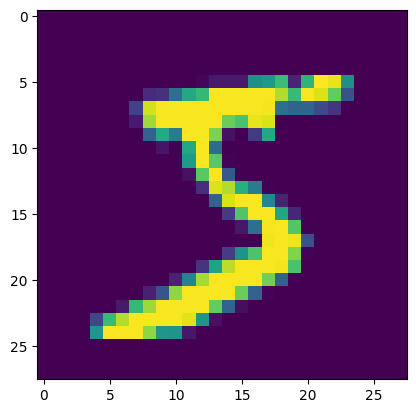

In [76]:
plt.imshow(np.squeeze(x_train[0]))

In [81]:
x_train=x_train/255
x_test=x_test/255

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28, 1)


In [82]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.optimizers import SGD,Adam
import tensorflow as tf

In [83]:
print(x_train.shape[1])
print(x_train.shape[2])

28
28


In [84]:
# Encoder
encoder = Sequential()
encoder.add(Flatten(input_shape=[x_train.shape[1],x_train.shape[2]]))
encoder.add(Dense(500, activation='relu'))
encoder.add(Dense(400, activation='relu'))
encoder.add(Dense(300, activation='relu'))
encoder.add(Dense(200, activation='relu'))
encoder.add(Dense(100, activation='relu'))
encoder.add(Dense(50, activation='relu'))
encoder.add(Dense(25, activation='relu'))
encoder.add(Dense(10, activation='relu'))

In [85]:
#Decoder
decoder=Sequential()
decoder.add(Dense(25,input_shape=[10],activation='relu'))
decoder.add(Dense(50,activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(300,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(500,activation='relu'))
decoder.add(Dense(x_train.shape[1]*x_train.shape[2],activation='sigmoid'))
decoder.add(Reshape([28,28]))

In [86]:
autoencoder=Sequential([encoder,decoder])

In [87]:
autoencoder.compile(loss='binary_crossentropy',optimizer='Adam', metrics=['accuracy'])

In [88]:
autoencoder.fit(x_train, x_train, batch_size=256, epochs=50, validation_split=0.2, verbose=True)

Epoch 1/50
188/188 [==============================] - 8s 32ms/step - loss: 0.0579 - accuracy: 0.2565 - val_loss: 1.2077e-07 - val_accuracy: 0.2938
Epoch 2/50
188/188 [==============================] - 6s 30ms/step - loss: 1.2174e-07 - accuracy: 0.2955 - val_loss: 1.2077e-07 - val_accuracy: 0.2938
Epoch 3/50
188/188 [==============================] - 5s 29ms/step - loss: 1.2174e-07 - accuracy: 0.2955 - val_loss: 1.2077e-07 - val_accuracy: 0.2938
Epoch 4/50
188/188 [==============================] - 6s 29ms/step - loss: 1.2174e-07 - accuracy: 0.2955 - val_loss: 1.2077e-07 - val_accuracy: 0.2938
Epoch 5/50
188/188 [==============================] - 6s 30ms/step - loss: 1.2174e-07 - accuracy: 0.2955 - val_loss: 1.2077e-07 - val_accuracy: 0.2938
Epoch 6/50
188/188 [==============================] - 6s 29ms/step - loss: 1.2174e-07 - accuracy: 0.2955 - val_loss: 1.2077e-07 - val_accuracy: 0.2938
Epoch 7/50
188/188 [==============================] - 5s 29ms/step - loss: 1.2174e-07 - accuracy: 

In [92]:
#prediction
predicted=autoencoder.predict(x_test)

313/313 [==============================] - 1s 4ms/step


In [98]:
predicted.sum()

0.0

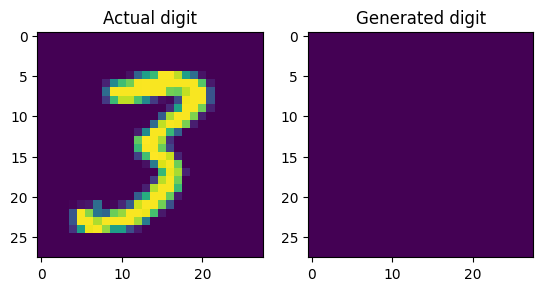

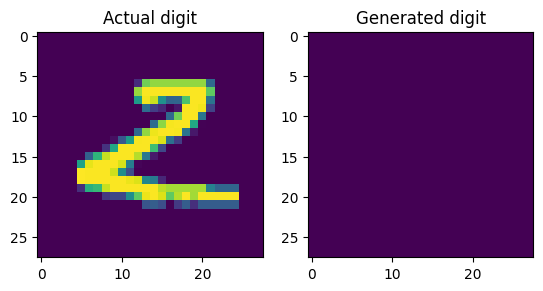

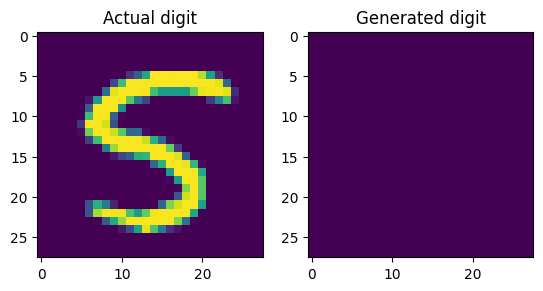

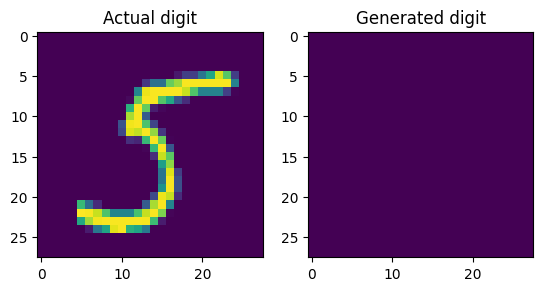

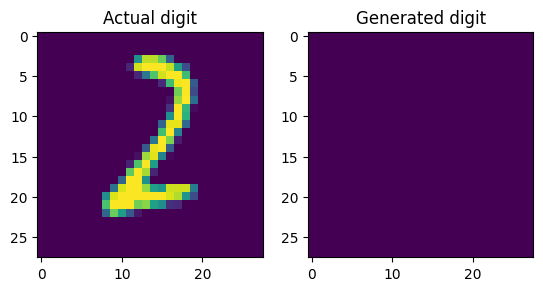

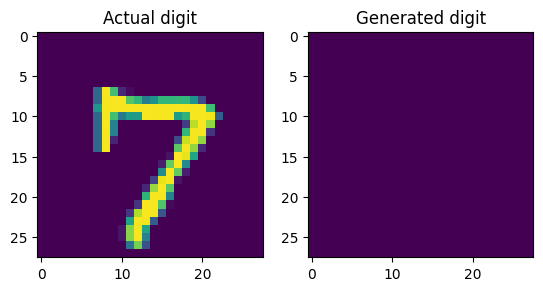

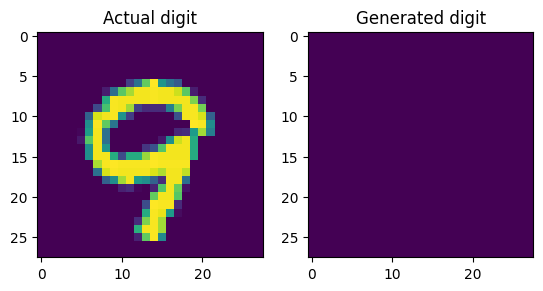

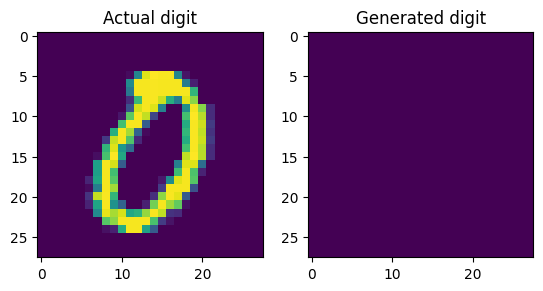

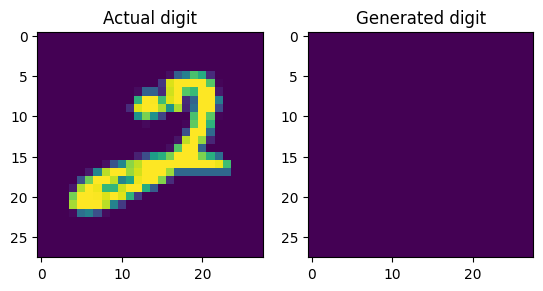

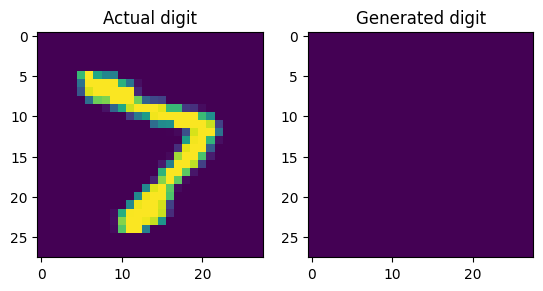

In [91]:
for i in range(10):
    n=np.random.randint(1,(x_test.shape[0]))
    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(x_test[n])
    plt.title('Actual digit')
    plt.subplot(1,2,2)
    plt.imshow(predicted[n])
    plt.title('Generated digit')